Name: Santosh Singh Rawat
ubId:50496188

Name: Jyosna Reddy Matta
ubId:50495714

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords

In [7]:
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MarySharmilaRongali\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import os
news_dataset = pd.read_csv('WELFake_Dataset.csv')
news_dataset.head()
news_dataset.isnull().sum()
news_dataset = news_dataset.fillna('')
news_dataset['content'] = news_dataset['text']
print(news_dataset['content'])
X = news_dataset.drop(columns=['label'],axis=1)
Y = news_dataset['label']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: content, Length: 72134, dtype: object


In [ ]:
from nltk.stem.porter import PorterStemmer
import re
port_stem = PorterStemmer()
def preprocess_text(text_data):
    stop_words = set(stopwords.words('english'))
    processed_sentences = []
    for sentence in text_data:
        cleaned_sentence = re.sub(r'[^\w\s]', '', sentence)     
        tokens = cleaned_sentence.split()                      
        filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
        processed_sentences.append(' '.join(filtered_tokens))

    return processed_sentences

function to remove non-alphanumeric characters and whitespace, and stopwords from the text.

In [9]:
news_dataset['content'] =  preprocess_text(news_dataset['content'].values)
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [35]:
print(news_dataset['content'])

0        comment expected barack obama members fyf911 f...
1                               post votes hillary already
2        demonstrators gathered last night exercising c...
3        dozen politically active pastors came private ...
4        rs28 sarmat missile dubbed satan 2 replace ss1...
                               ...                        
72129    washington reuters hackers believed working ru...
72130    know fantasyland republicans never questioned ...
72131    migrants refuse leave train refugee camp hunga...
72132    mexico city reuters donald trumps combative st...
72133    goldman sachs endorses hillary clinton preside...
Name: content, Length: 72134, dtype: object


In [10]:
# vectorizing the data and split data into training set and test set
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state=42)

modeling random forest

In [37]:
clf_rf=RandomForestClassifier()
clf_rf=clf_rf.fit(X_train, Y_train)
predictions_rf = clf_rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(predictions_rf, Y_test)
test_data_accuracy_rf = round(test_data_accuracy_rf, 3)
print('Accuracy score of the test data : ', test_data_accuracy_rf)

Accuracy score of the test data :  0.938


In [43]:
print(classification_report(Y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7006
           1       0.94      0.94      0.94      7421

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



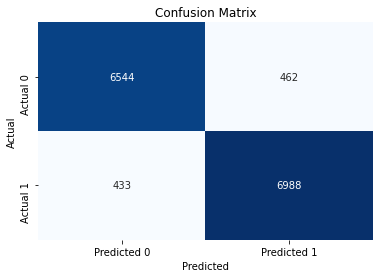

In [46]:
cm = confusion_matrix(Y_test, predictions_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Modeling Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
mNB=MultinomialNB()
mNB=mNB.fit(X_train, Y_train)
predictions_mNB = mNB.predict(X_test)
test_data_accuracy_mNB = accuracy_score(predictions_mNB, Y_test)
test_data_accuracy_mNB = round(test_data_accuracy_mNB, 3)
print('Accuracy score of the test data : ', test_data_accuracy_mNB)

Accuracy score of the test data :  0.871


In [12]:
print(classification_report(Y_test, predictions_mNB))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      7006
           1       0.91      0.83      0.87      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427



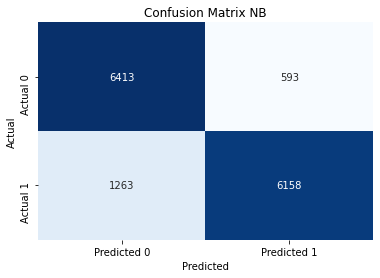

In [18]:
cm = confusion_matrix(Y_test, predictions_mNB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix NB')
plt.show()

Modeling Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, Y_train)

Y_pred_log = log_clf.predict(X_test)
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7006
           1       0.95      0.97      0.96      7421

    accuracy                           0.96     14427
   macro avg       0.96      0.95      0.96     14427
weighted avg       0.96      0.96      0.96     14427



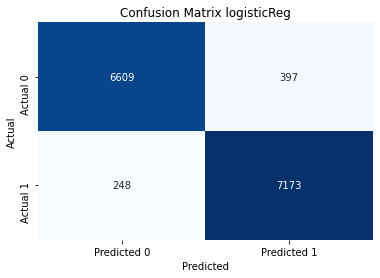

In [17]:
cm = confusion_matrix(Y_test, Y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix logisticReg')
plt.show()

On comparing the three models, Random forest, Naive bayes and logistic Regression. Rnadom forest and Logistic regression performed very well on these data with accuracy around 94 & 96 respectively. 